In [1]:
import pandas as pd

In [4]:
df: pd.DataFrame = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                              names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [15]:
df["class"][49]

'Iris-setosa'

In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
x = df.drop("class", axis=1)

In [19]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y = df["class"]

In [22]:
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [23]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca3 = PCA(n_components=3)

In [39]:
pca2 = PCA(n_components=2)

In [40]:
pca1 = PCA(n_components=1)

In [41]:
pca1_iris = pca1.fit_transform(x)

In [96]:
%%timeit
pca2_iris = pca2.fit_transform(x)

428 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [43]:
pca3_iris = pca3.fit_transform(x)

In [44]:
pca2_data = pd.DataFrame(data = pca2_iris, columns = ['PC1', 'PC2'])

In [45]:
pca3_data = pd.DataFrame(data = pca3_iris, columns = ['PC1', 'PC2', 'PC3'])

In [46]:
pca1_data = pd.DataFrame(data = pca1_iris, columns = ['PC1'])

In [47]:
pca1_data.head()

,PC1
0,-2.264542
1,-2.086426
2,-2.367950
3,-2.304197
4,-2.388777


In [53]:
pca1.explained_variance_ratio_

array([0.72770452])

In [48]:
pca2_data.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [54]:
pca2.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [49]:
pca3_data.head()

,PC1,PC2,PC3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [55]:
pca3.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [56]:
pca2_data = pd.concat([pca2_data, y], axis=1)

In [57]:
pca2_data.head()

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [61]:
import seaborn as sns

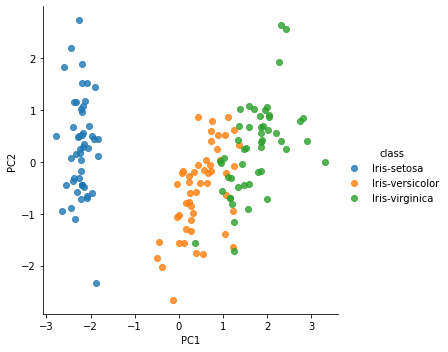

In [63]:
sns.lmplot(x="PC1", y="PC2", data=pca2_data, hue="class", fit_reg=False)

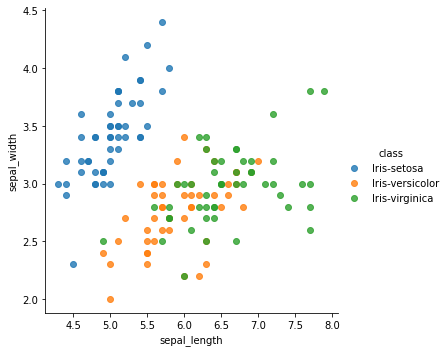

In [64]:
sns.lmplot(x="sepal_length", y="sepal_width", data=df, hue="class", fit_reg=False)

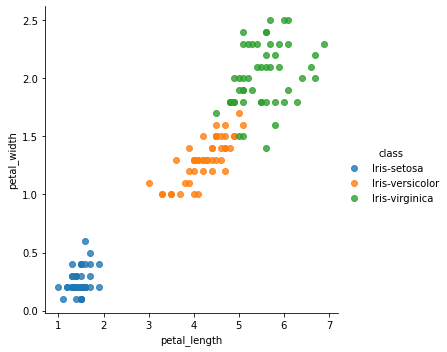

In [65]:
sns.lmplot(x="petal_length", y="petal_width", data=df, hue="class", fit_reg=False)

In [98]:
"""
From here linear discriminant analysis:
This is a supervised learning so it needs labeled data. 
Since it focuses on labels instead of focusing information delivery as in PCA,
for labeled data this gives better result.
"""

'\nFrom here linear discriminant analysis:\nThis is a supervised learning so it needs labeled data. \nSince it focuses on labels instead of focusing information delivery as in PCA,\nfor labeled data this gives better result.\n'

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [97]:
%%timeit
lda_iris = lda.fit_transform(x, y)

1.13 ms ± 990 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [90]:
lda_iris

array([[ 8.0849532 ,  0.32845422],
       [ 7.1471629 , -0.75547326],
       [ 7.51137789, -0.23807832],
       [ 6.83767561, -0.64288476],
       [ 8.15781367,  0.54063935],
       [ 7.72363087,  1.48232345],
       [ 7.23514662,  0.3771537 ],
       [ 7.62974497,  0.01667246],
       [ 6.58274132, -0.98737424],
       [ 7.36884116, -0.91362729],
       [ 8.42181434,  0.67622968],
       [ 7.24739721, -0.08292417],
       [ 7.35062105, -1.0393597 ],
       [ 7.59646896, -0.77671553],
       [ 9.86936588,  1.61486093],
       [ 9.18033614,  2.75558626],
       [ 8.59760709,  1.85442217],
       [ 7.7995682 ,  0.60905468],
       [ 8.1000091 ,  0.99610981],
       [ 8.04543611,  1.16244332],
       [ 7.52046427, -0.156233  ],
       [ 7.60526378,  1.22757267],
       [ 8.70408249,  0.89959416],
       [ 6.26374139,  0.46023935],
       [ 6.59191505, -0.36199821],
       [ 6.79210164, -0.93823664],
       [ 6.84048091,  0.4848487 ],
       [ 7.948386  ,  0.23871551],
       [ 8.01209273,

In [91]:
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

In [92]:
lda_iris.head()

,C1,C2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639


In [93]:
lda_iris = pd.concat([lda_iris, y], axis = 1)

In [94]:
lda_iris.head()

,C1,C2,class
0,8.084953,0.328454,Iris-setosa
1,7.147163,-0.755473,Iris-setosa
2,7.511378,-0.238078,Iris-setosa
3,6.837676,-0.642885,Iris-setosa
4,8.157814,0.540639,Iris-setosa


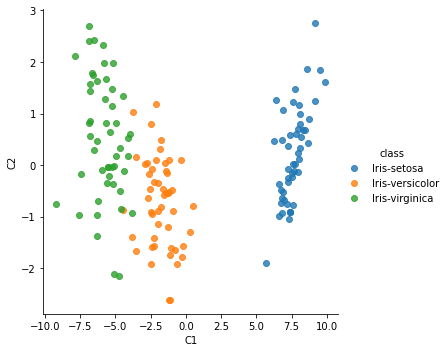

In [95]:
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

In [99]:
"""
Ensembling
"""

'\nEnsembling\n'

In [127]:
x, y = df.drop("class", axis=1), df["class"]

In [128]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [131]:
gbc = GradientBoostingClassifier()

In [132]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [133]:
gbc.score(x_test, y_test)

0.9736842105263158

In [134]:
gbc.predict([[6.3, 3.3, 6.0, 2.5]])

/home/yuio/.venv/recommender/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

<AxesSubplot:>

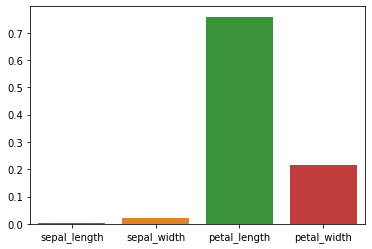

In [135]:
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y = gbc.feature_importances_)